# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

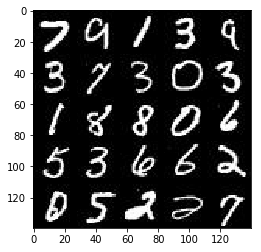

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

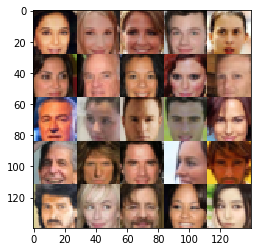

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        x = tf.layers.conv2d(images, 64, kernel_size=[5,5], padding='same', strides=1)
        x = tf.maximum(0.2 * x, x)
        
        x1 = tf.layers.conv2d(x, 128, kernel_size=[5,5], padding='same', strides=2)
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(0.2 * x1, x1)
        
        x2 = tf.layers.conv2d(x1, 256, kernel_size=[5,5], padding='same', strides=2)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(0.2 * x2, x2)
        
        x3 = tf.layers.conv2d(x2, 512, kernel_size=[5,5], padding='same', strides=2)
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(0.2 * x3, x3)
        
        t_shape = x3.get_shape().as_list()
        flat = tf.reshape(x3, (-1, t_shape[1]*t_shape[2]*t_shape[3]))
        
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse = False
    if not is_train:
        reuse = True
    
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        x = tf.layers.dense(z, 7*7*512, activation=None)
        x = tf.reshape(x, (-1,7,7,512))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2 * x, x)
        
        # First transpose convolution - 14X14X256
        
        x = tf.layers.conv2d_transpose(x, 256, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2 * x, x)
        
        # Second transpose convolution - 28X28X128
        
        x = tf.layers.conv2d_transpose(x, 128, 5, strides=2, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2 * x, x)
        
        # Third transpose convolution - 28X28X64
        
        x = tf.layers.conv2d_transpose(x, 64, 5, strides=1, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2 * x, x)
        
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, strides=1, padding='same')
        
        
        # Output layer, 28X28Xout_channel_dim        
        out = tf.tanh(logits)
        
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learn_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    tf.reset_default_graph()
        
    input_real, input_z, learning_rate= model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
        
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
        
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    steps = 0
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2.0
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate: learn_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, learning_rate: learn_rate, input_real: batch_images})
                
                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
                if steps % 10 == 0:
    
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images, learning_rate: learn_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, learning_rate: learn_rate, input_real: batch_images})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
Epoch 1/2... Discriminator Loss: 0.5421... Generator Loss: 3.1919
Epoch 1/2... Discriminator Loss: 0.4888... Generator Loss: 2.3730
Epoch 1/2... Discriminator Loss: 0.8077... Generator Loss: 8.3427
Epoch 1/2... Discriminator Loss: 6.0476... Generator Loss: 0.0522
Epoch 1/2... Discriminator Loss: 0.5350... Generator Loss: 4.6209
Epoch 1/2... Discriminator Loss: 2.4555... Generator Loss: 0.2170
Epoch 1/2... Discriminator Loss: 1.2810... Generator Loss: 0.8133
Epoch 1/2... Discriminator Loss: 0.9126... Generator Loss: 1.4908
Epoch 1/2... Discriminator Loss: 1.1292... Generator Loss: 0.8273


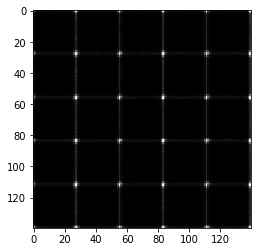

Epoch 1/2... Discriminator Loss: 1.6010... Generator Loss: 0.4967
Epoch 1/2... Discriminator Loss: 1.3866... Generator Loss: 0.6707
Epoch 1/2... Discriminator Loss: 1.7394... Generator Loss: 0.4112
Epoch 1/2... Discriminator Loss: 1.2714... Generator Loss: 1.2200
Epoch 1/2... Discriminator Loss: 1.5042... Generator Loss: 0.4549
Epoch 1/2... Discriminator Loss: 1.1213... Generator Loss: 1.1540
Epoch 1/2... Discriminator Loss: 1.0478... Generator Loss: 1.1090
Epoch 1/2... Discriminator Loss: 1.1985... Generator Loss: 0.6753
Epoch 1/2... Discriminator Loss: 1.4126... Generator Loss: 0.5884
Epoch 1/2... Discriminator Loss: 0.9972... Generator Loss: 2.0157


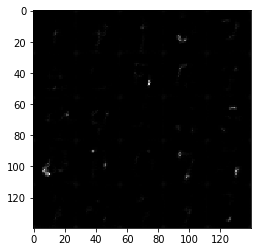

Epoch 1/2... Discriminator Loss: 1.1730... Generator Loss: 0.8328
Epoch 1/2... Discriminator Loss: 1.0473... Generator Loss: 0.8221
Epoch 1/2... Discriminator Loss: 1.1266... Generator Loss: 0.9555
Epoch 1/2... Discriminator Loss: 0.7570... Generator Loss: 1.8210
Epoch 1/2... Discriminator Loss: 1.1681... Generator Loss: 1.4009
Epoch 1/2... Discriminator Loss: 1.3504... Generator Loss: 0.5059
Epoch 1/2... Discriminator Loss: 1.4084... Generator Loss: 2.8691
Epoch 1/2... Discriminator Loss: 1.1289... Generator Loss: 2.2677
Epoch 1/2... Discriminator Loss: 1.2451... Generator Loss: 0.8290
Epoch 1/2... Discriminator Loss: 1.2960... Generator Loss: 0.6394


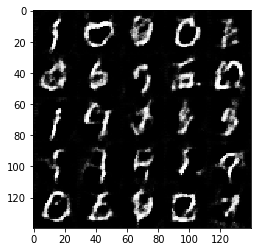

Epoch 1/2... Discriminator Loss: 1.0608... Generator Loss: 0.9934
Epoch 1/2... Discriminator Loss: 1.2912... Generator Loss: 1.7026
Epoch 1/2... Discriminator Loss: 1.2806... Generator Loss: 0.6732
Epoch 1/2... Discriminator Loss: 1.4869... Generator Loss: 0.5061
Epoch 1/2... Discriminator Loss: 1.3598... Generator Loss: 1.9322
Epoch 1/2... Discriminator Loss: 0.9735... Generator Loss: 1.3937
Epoch 1/2... Discriminator Loss: 1.6603... Generator Loss: 0.3980
Epoch 1/2... Discriminator Loss: 1.1221... Generator Loss: 0.7559
Epoch 1/2... Discriminator Loss: 1.8856... Generator Loss: 3.0492
Epoch 1/2... Discriminator Loss: 1.2367... Generator Loss: 0.6798


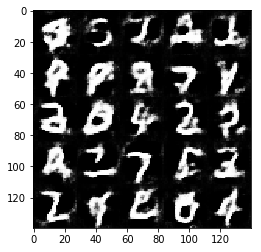

Epoch 1/2... Discriminator Loss: 1.3715... Generator Loss: 0.5458
Epoch 1/2... Discriminator Loss: 1.1221... Generator Loss: 0.8313
Epoch 1/2... Discriminator Loss: 1.7459... Generator Loss: 0.3628
Epoch 1/2... Discriminator Loss: 1.2109... Generator Loss: 0.7474
Epoch 1/2... Discriminator Loss: 1.3079... Generator Loss: 0.5802
Epoch 1/2... Discriminator Loss: 1.5369... Generator Loss: 2.0568
Epoch 1/2... Discriminator Loss: 1.0173... Generator Loss: 1.8053
Epoch 1/2... Discriminator Loss: 1.5415... Generator Loss: 0.4044
Epoch 1/2... Discriminator Loss: 1.4314... Generator Loss: 0.4684
Epoch 1/2... Discriminator Loss: 1.0446... Generator Loss: 1.0683


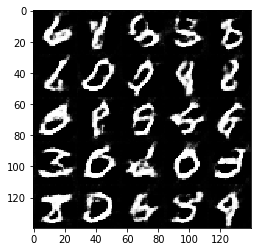

Epoch 1/2... Discriminator Loss: 1.2460... Generator Loss: 0.6231
Epoch 1/2... Discriminator Loss: 0.9072... Generator Loss: 1.3316
Epoch 1/2... Discriminator Loss: 0.9879... Generator Loss: 1.9500
Epoch 1/2... Discriminator Loss: 1.0084... Generator Loss: 0.8703
Epoch 1/2... Discriminator Loss: 0.7998... Generator Loss: 1.2779
Epoch 1/2... Discriminator Loss: 1.2265... Generator Loss: 2.4281
Epoch 1/2... Discriminator Loss: 0.7986... Generator Loss: 2.1987
Epoch 1/2... Discriminator Loss: 1.2799... Generator Loss: 0.7276
Epoch 1/2... Discriminator Loss: 1.2041... Generator Loss: 0.7127
Epoch 1/2... Discriminator Loss: 2.0016... Generator Loss: 0.2779


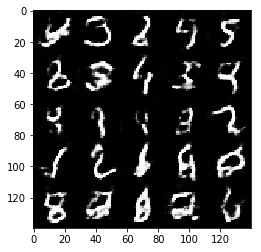

Epoch 1/2... Discriminator Loss: 0.9235... Generator Loss: 1.6047
Epoch 1/2... Discriminator Loss: 0.8840... Generator Loss: 1.0686
Epoch 1/2... Discriminator Loss: 1.0352... Generator Loss: 0.9012
Epoch 1/2... Discriminator Loss: 1.2146... Generator Loss: 1.8848
Epoch 1/2... Discriminator Loss: 1.0093... Generator Loss: 0.9809
Epoch 1/2... Discriminator Loss: 1.1225... Generator Loss: 0.8285
Epoch 1/2... Discriminator Loss: 1.3106... Generator Loss: 0.8129
Epoch 1/2... Discriminator Loss: 0.9095... Generator Loss: 1.1054
Epoch 1/2... Discriminator Loss: 1.0218... Generator Loss: 0.8244
Epoch 1/2... Discriminator Loss: 0.9308... Generator Loss: 1.0349


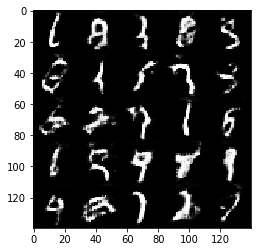

Epoch 1/2... Discriminator Loss: 1.1843... Generator Loss: 0.6726
Epoch 1/2... Discriminator Loss: 0.7269... Generator Loss: 1.5324
Epoch 1/2... Discriminator Loss: 1.1392... Generator Loss: 0.7145
Epoch 1/2... Discriminator Loss: 1.0552... Generator Loss: 1.9397
Epoch 1/2... Discriminator Loss: 1.1892... Generator Loss: 0.8390
Epoch 1/2... Discriminator Loss: 0.9952... Generator Loss: 0.9562
Epoch 1/2... Discriminator Loss: 1.4652... Generator Loss: 0.4799
Epoch 1/2... Discriminator Loss: 0.7718... Generator Loss: 1.3034
Epoch 1/2... Discriminator Loss: 1.3606... Generator Loss: 2.6663
Epoch 1/2... Discriminator Loss: 0.6821... Generator Loss: 1.4981


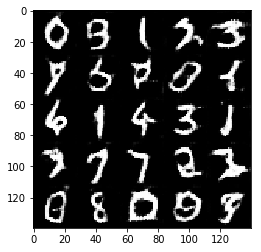

Epoch 1/2... Discriminator Loss: 0.8692... Generator Loss: 1.4439
Epoch 1/2... Discriminator Loss: 1.1706... Generator Loss: 0.7071
Epoch 1/2... Discriminator Loss: 1.1207... Generator Loss: 0.8227
Epoch 1/2... Discriminator Loss: 1.6253... Generator Loss: 0.3997
Epoch 1/2... Discriminator Loss: 0.8638... Generator Loss: 1.3099
Epoch 1/2... Discriminator Loss: 0.7243... Generator Loss: 1.4145
Epoch 1/2... Discriminator Loss: 1.6991... Generator Loss: 0.4087
Epoch 1/2... Discriminator Loss: 0.8582... Generator Loss: 1.4446
Epoch 1/2... Discriminator Loss: 0.8556... Generator Loss: 1.0661
Epoch 1/2... Discriminator Loss: 0.9494... Generator Loss: 1.0460


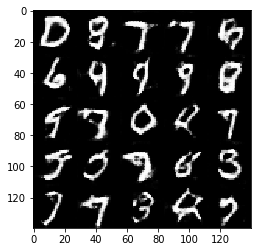

Epoch 1/2... Discriminator Loss: 1.0400... Generator Loss: 0.8262
Epoch 1/2... Discriminator Loss: 1.1070... Generator Loss: 2.4518
Epoch 1/2... Discriminator Loss: 1.4874... Generator Loss: 0.4826
Epoch 1/2... Discriminator Loss: 1.2443... Generator Loss: 0.6207
Epoch 1/2... Discriminator Loss: 1.0059... Generator Loss: 1.0552
Epoch 1/2... Discriminator Loss: 1.5871... Generator Loss: 0.4373
Epoch 1/2... Discriminator Loss: 0.9390... Generator Loss: 1.0692
Epoch 1/2... Discriminator Loss: 1.0990... Generator Loss: 0.8456
Epoch 1/2... Discriminator Loss: 1.2325... Generator Loss: 2.3888
Epoch 1/2... Discriminator Loss: 1.1102... Generator Loss: 0.8341


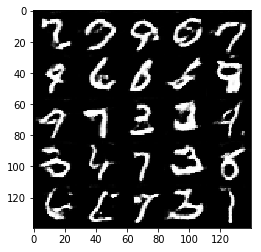

Epoch 1/2... Discriminator Loss: 0.8423... Generator Loss: 1.8994
Epoch 1/2... Discriminator Loss: 0.8091... Generator Loss: 2.2203
Epoch 1/2... Discriminator Loss: 1.3272... Generator Loss: 2.5827
Epoch 1/2... Discriminator Loss: 0.8642... Generator Loss: 1.0776
Epoch 1/2... Discriminator Loss: 1.3827... Generator Loss: 0.5451
Epoch 1/2... Discriminator Loss: 1.2359... Generator Loss: 0.7808
Epoch 1/2... Discriminator Loss: 0.8663... Generator Loss: 1.0913
Epoch 1/2... Discriminator Loss: 1.1747... Generator Loss: 0.7230
Epoch 1/2... Discriminator Loss: 1.3310... Generator Loss: 2.2209
Epoch 1/2... Discriminator Loss: 0.8353... Generator Loss: 1.1187


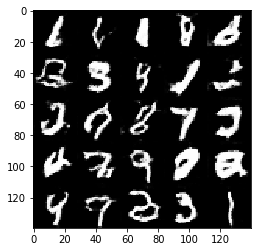

Epoch 1/2... Discriminator Loss: 0.8640... Generator Loss: 1.9948
Epoch 1/2... Discriminator Loss: 1.3359... Generator Loss: 0.6395
Epoch 1/2... Discriminator Loss: 0.8684... Generator Loss: 1.5850
Epoch 1/2... Discriminator Loss: 1.1672... Generator Loss: 0.6871
Epoch 1/2... Discriminator Loss: 0.6335... Generator Loss: 1.7595
Epoch 1/2... Discriminator Loss: 0.9204... Generator Loss: 2.4302
Epoch 1/2... Discriminator Loss: 0.9279... Generator Loss: 1.1148
Epoch 1/2... Discriminator Loss: 0.8991... Generator Loss: 2.1687
Epoch 1/2... Discriminator Loss: 0.7796... Generator Loss: 1.7307
Epoch 1/2... Discriminator Loss: 0.9011... Generator Loss: 1.0174


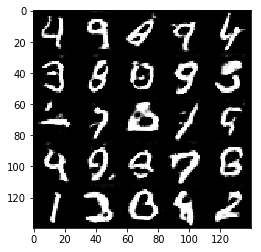

Epoch 1/2... Discriminator Loss: 0.8818... Generator Loss: 1.0244
Epoch 1/2... Discriminator Loss: 0.8383... Generator Loss: 1.0937
Epoch 1/2... Discriminator Loss: 2.5765... Generator Loss: 0.2075
Epoch 1/2... Discriminator Loss: 0.8377... Generator Loss: 1.1948
Epoch 1/2... Discriminator Loss: 0.6675... Generator Loss: 1.8482
Epoch 1/2... Discriminator Loss: 0.8437... Generator Loss: 1.4811
Epoch 1/2... Discriminator Loss: 0.9075... Generator Loss: 0.9547
Epoch 1/2... Discriminator Loss: 0.6409... Generator Loss: 1.6439
Epoch 1/2... Discriminator Loss: 0.7792... Generator Loss: 1.3697
Epoch 1/2... Discriminator Loss: 1.3111... Generator Loss: 0.5620


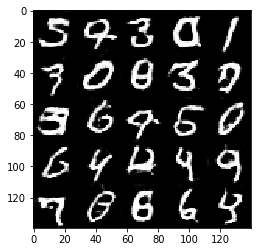

Epoch 1/2... Discriminator Loss: 0.6088... Generator Loss: 1.8887
Epoch 1/2... Discriminator Loss: 2.2554... Generator Loss: 0.6039
Epoch 1/2... Discriminator Loss: 1.1935... Generator Loss: 0.6195
Epoch 1/2... Discriminator Loss: 1.0326... Generator Loss: 0.8478
Epoch 1/2... Discriminator Loss: 1.5681... Generator Loss: 0.5171
Epoch 1/2... Discriminator Loss: 0.7422... Generator Loss: 1.8912
Epoch 1/2... Discriminator Loss: 0.9276... Generator Loss: 0.9726
Epoch 1/2... Discriminator Loss: 0.8048... Generator Loss: 1.5206
Epoch 1/2... Discriminator Loss: 0.6963... Generator Loss: 1.5136
Epoch 1/2... Discriminator Loss: 0.6921... Generator Loss: 1.4682


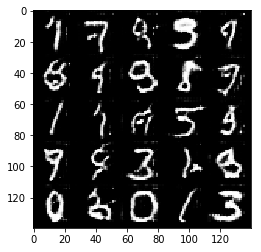

Epoch 1/2... Discriminator Loss: 0.7065... Generator Loss: 2.1530
Epoch 1/2... Discriminator Loss: 0.7825... Generator Loss: 1.4652
Epoch 1/2... Discriminator Loss: 0.6198... Generator Loss: 1.9493
Epoch 1/2... Discriminator Loss: 0.8841... Generator Loss: 1.0021
Epoch 1/2... Discriminator Loss: 1.1691... Generator Loss: 0.8112
Epoch 1/2... Discriminator Loss: 0.5975... Generator Loss: 1.8894
Epoch 1/2... Discriminator Loss: 1.0035... Generator Loss: 0.9064
Epoch 1/2... Discriminator Loss: 0.8887... Generator Loss: 1.9711
Epoch 1/2... Discriminator Loss: 0.9939... Generator Loss: 1.2617
Epoch 1/2... Discriminator Loss: 0.9703... Generator Loss: 0.9657


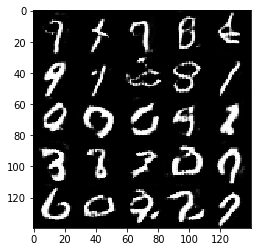

Epoch 1/2... Discriminator Loss: 1.1867... Generator Loss: 0.7440
Epoch 1/2... Discriminator Loss: 0.7436... Generator Loss: 1.5397
Epoch 1/2... Discriminator Loss: 1.1281... Generator Loss: 0.7273
Epoch 1/2... Discriminator Loss: 1.0305... Generator Loss: 1.0092
Epoch 1/2... Discriminator Loss: 0.7395... Generator Loss: 1.5693
Epoch 1/2... Discriminator Loss: 0.8153... Generator Loss: 1.2117
Epoch 1/2... Discriminator Loss: 0.7530... Generator Loss: 1.2750
Epoch 1/2... Discriminator Loss: 0.6182... Generator Loss: 1.7358
Epoch 1/2... Discriminator Loss: 0.7891... Generator Loss: 1.2026
Epoch 1/2... Discriminator Loss: 0.6798... Generator Loss: 1.6272


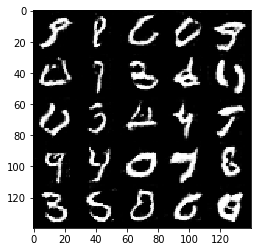

Epoch 1/2... Discriminator Loss: 0.9163... Generator Loss: 1.1123
Epoch 1/2... Discriminator Loss: 1.2540... Generator Loss: 0.7706
Epoch 1/2... Discriminator Loss: 0.7557... Generator Loss: 1.3081
Epoch 1/2... Discriminator Loss: 0.5093... Generator Loss: 2.1846
Epoch 1/2... Discriminator Loss: 0.8332... Generator Loss: 2.9070
Epoch 1/2... Discriminator Loss: 0.7963... Generator Loss: 1.5089
Epoch 1/2... Discriminator Loss: 0.8226... Generator Loss: 1.1502
Epoch 1/2... Discriminator Loss: 0.7292... Generator Loss: 1.4363
Epoch 1/2... Discriminator Loss: 0.7857... Generator Loss: 1.1877
Epoch 1/2... Discriminator Loss: 0.8260... Generator Loss: 2.5243


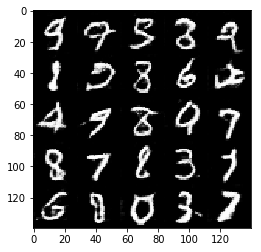

Epoch 1/2... Discriminator Loss: 0.9252... Generator Loss: 0.9313
Epoch 1/2... Discriminator Loss: 0.8309... Generator Loss: 1.2358
Epoch 1/2... Discriminator Loss: 0.9398... Generator Loss: 1.0609
Epoch 1/2... Discriminator Loss: 0.9956... Generator Loss: 0.9383
Epoch 1/2... Discriminator Loss: 0.8631... Generator Loss: 1.1508
Epoch 1/2... Discriminator Loss: 1.3000... Generator Loss: 0.6267
Epoch 1/2... Discriminator Loss: 0.9090... Generator Loss: 0.9698
Epoch 1/2... Discriminator Loss: 0.5143... Generator Loss: 2.1273
Epoch 1/2... Discriminator Loss: 0.5883... Generator Loss: 2.3111
Epoch 1/2... Discriminator Loss: 0.7309... Generator Loss: 2.5416


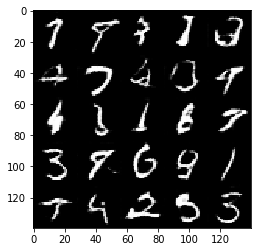

Epoch 1/2... Discriminator Loss: 0.6731... Generator Loss: 1.5704
Epoch 1/2... Discriminator Loss: 0.5683... Generator Loss: 1.9135
Epoch 1/2... Discriminator Loss: 1.2844... Generator Loss: 0.6834
Epoch 1/2... Discriminator Loss: 0.6609... Generator Loss: 1.4750
Epoch 1/2... Discriminator Loss: 1.1419... Generator Loss: 0.9171
Epoch 1/2... Discriminator Loss: 0.5487... Generator Loss: 2.3135
Epoch 1/2... Discriminator Loss: 0.7289... Generator Loss: 1.4269
Epoch 1/2... Discriminator Loss: 1.1656... Generator Loss: 0.6999
Epoch 2/2... Discriminator Loss: 0.7397... Generator Loss: 1.3272
Epoch 2/2... Discriminator Loss: 0.7780... Generator Loss: 2.4900


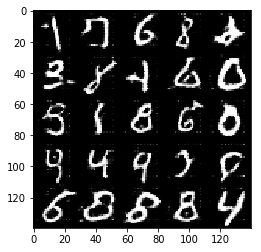

Epoch 2/2... Discriminator Loss: 0.7580... Generator Loss: 1.2643
Epoch 2/2... Discriminator Loss: 0.7913... Generator Loss: 1.2579
Epoch 2/2... Discriminator Loss: 0.4932... Generator Loss: 2.8251
Epoch 2/2... Discriminator Loss: 0.6867... Generator Loss: 2.5162
Epoch 2/2... Discriminator Loss: 1.6004... Generator Loss: 3.4824
Epoch 2/2... Discriminator Loss: 1.3388... Generator Loss: 0.6972
Epoch 2/2... Discriminator Loss: 0.5386... Generator Loss: 2.0095
Epoch 2/2... Discriminator Loss: 0.8188... Generator Loss: 1.2474
Epoch 2/2... Discriminator Loss: 0.8991... Generator Loss: 1.0915
Epoch 2/2... Discriminator Loss: 1.0062... Generator Loss: 0.9818


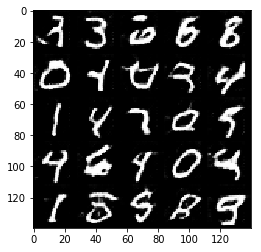

Epoch 2/2... Discriminator Loss: 1.6266... Generator Loss: 0.6017
Epoch 2/2... Discriminator Loss: 0.8060... Generator Loss: 1.2551
Epoch 2/2... Discriminator Loss: 1.1178... Generator Loss: 0.8702
Epoch 2/2... Discriminator Loss: 0.5951... Generator Loss: 1.8880
Epoch 2/2... Discriminator Loss: 0.7232... Generator Loss: 1.3854
Epoch 2/2... Discriminator Loss: 0.8415... Generator Loss: 1.1391
Epoch 2/2... Discriminator Loss: 0.6011... Generator Loss: 1.7495
Epoch 2/2... Discriminator Loss: 0.8515... Generator Loss: 1.9244
Epoch 2/2... Discriminator Loss: 0.7590... Generator Loss: 1.5563
Epoch 2/2... Discriminator Loss: 1.1460... Generator Loss: 0.7751


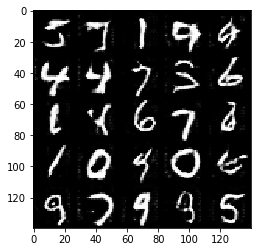

Epoch 2/2... Discriminator Loss: 0.8771... Generator Loss: 1.0995
Epoch 2/2... Discriminator Loss: 0.6884... Generator Loss: 1.4459
Epoch 2/2... Discriminator Loss: 0.7433... Generator Loss: 1.3121
Epoch 2/2... Discriminator Loss: 0.7351... Generator Loss: 1.3431
Epoch 2/2... Discriminator Loss: 0.7789... Generator Loss: 1.3835
Epoch 2/2... Discriminator Loss: 0.9014... Generator Loss: 0.9989
Epoch 2/2... Discriminator Loss: 0.7976... Generator Loss: 1.2873
Epoch 2/2... Discriminator Loss: 0.6814... Generator Loss: 1.5108
Epoch 2/2... Discriminator Loss: 1.3294... Generator Loss: 0.7018
Epoch 2/2... Discriminator Loss: 0.6304... Generator Loss: 2.6269


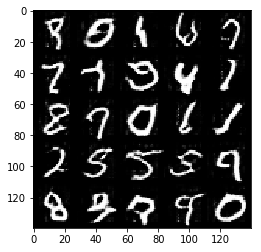

Epoch 2/2... Discriminator Loss: 0.7679... Generator Loss: 1.3788
Epoch 2/2... Discriminator Loss: 0.8126... Generator Loss: 1.1603
Epoch 2/2... Discriminator Loss: 0.7303... Generator Loss: 1.3909
Epoch 2/2... Discriminator Loss: 0.6116... Generator Loss: 1.6557
Epoch 2/2... Discriminator Loss: 0.4667... Generator Loss: 2.4910
Epoch 2/2... Discriminator Loss: 2.3391... Generator Loss: 3.6813
Epoch 2/2... Discriminator Loss: 1.0031... Generator Loss: 0.8544
Epoch 2/2... Discriminator Loss: 0.9747... Generator Loss: 1.2480
Epoch 2/2... Discriminator Loss: 1.0787... Generator Loss: 0.8164
Epoch 2/2... Discriminator Loss: 0.7674... Generator Loss: 1.2791


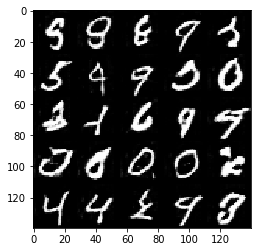

Epoch 2/2... Discriminator Loss: 0.7866... Generator Loss: 1.2193
Epoch 2/2... Discriminator Loss: 1.6858... Generator Loss: 0.4836
Epoch 2/2... Discriminator Loss: 0.6468... Generator Loss: 1.9231
Epoch 2/2... Discriminator Loss: 0.6257... Generator Loss: 1.5937
Epoch 2/2... Discriminator Loss: 0.5142... Generator Loss: 2.1099
Epoch 2/2... Discriminator Loss: 0.5773... Generator Loss: 2.1027
Epoch 2/2... Discriminator Loss: 0.8249... Generator Loss: 1.2316
Epoch 2/2... Discriminator Loss: 0.6385... Generator Loss: 1.8385
Epoch 2/2... Discriminator Loss: 0.7372... Generator Loss: 1.3484
Epoch 2/2... Discriminator Loss: 1.8145... Generator Loss: 0.4814


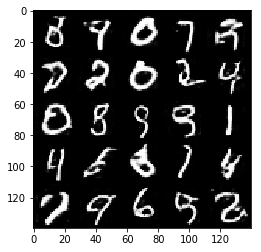

Epoch 2/2... Discriminator Loss: 0.9814... Generator Loss: 1.0350
Epoch 2/2... Discriminator Loss: 0.8454... Generator Loss: 1.1806
Epoch 2/2... Discriminator Loss: 0.6895... Generator Loss: 1.4288
Epoch 2/2... Discriminator Loss: 0.7446... Generator Loss: 1.2915
Epoch 2/2... Discriminator Loss: 0.6776... Generator Loss: 1.5103
Epoch 2/2... Discriminator Loss: 0.7834... Generator Loss: 1.2900
Epoch 2/2... Discriminator Loss: 0.7757... Generator Loss: 1.2182
Epoch 2/2... Discriminator Loss: 1.0204... Generator Loss: 1.7266
Epoch 2/2... Discriminator Loss: 0.9300... Generator Loss: 1.4729
Epoch 2/2... Discriminator Loss: 1.4530... Generator Loss: 0.5284


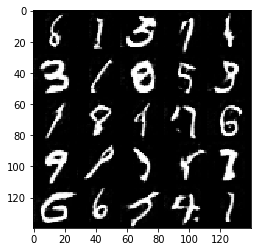

Epoch 2/2... Discriminator Loss: 0.6615... Generator Loss: 1.5275
Epoch 2/2... Discriminator Loss: 1.3703... Generator Loss: 0.6243
Epoch 2/2... Discriminator Loss: 0.9257... Generator Loss: 0.9483
Epoch 2/2... Discriminator Loss: 1.2973... Generator Loss: 0.5978
Epoch 2/2... Discriminator Loss: 0.5688... Generator Loss: 2.1332
Epoch 2/2... Discriminator Loss: 1.0895... Generator Loss: 0.7183
Epoch 2/2... Discriminator Loss: 0.6435... Generator Loss: 1.7906
Epoch 2/2... Discriminator Loss: 0.5409... Generator Loss: 1.9056
Epoch 2/2... Discriminator Loss: 1.1622... Generator Loss: 3.1003
Epoch 2/2... Discriminator Loss: 0.8127... Generator Loss: 1.4089


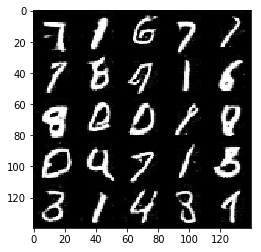

Epoch 2/2... Discriminator Loss: 0.8096... Generator Loss: 1.2900
Epoch 2/2... Discriminator Loss: 0.6458... Generator Loss: 1.7620
Epoch 2/2... Discriminator Loss: 0.7209... Generator Loss: 2.0939
Epoch 2/2... Discriminator Loss: 0.5318... Generator Loss: 2.1644
Epoch 2/2... Discriminator Loss: 0.5930... Generator Loss: 2.5236
Epoch 2/2... Discriminator Loss: 0.7476... Generator Loss: 1.6442
Epoch 2/2... Discriminator Loss: 0.7743... Generator Loss: 1.4160
Epoch 2/2... Discriminator Loss: 0.8799... Generator Loss: 1.1216
Epoch 2/2... Discriminator Loss: 0.6888... Generator Loss: 1.5481
Epoch 2/2... Discriminator Loss: 0.7453... Generator Loss: 1.2686


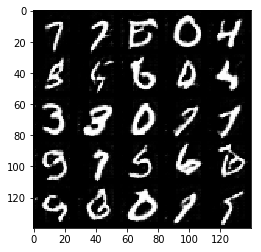

Epoch 2/2... Discriminator Loss: 0.6294... Generator Loss: 1.8430
Epoch 2/2... Discriminator Loss: 1.1178... Generator Loss: 0.7581
Epoch 2/2... Discriminator Loss: 0.7608... Generator Loss: 1.2960
Epoch 2/2... Discriminator Loss: 0.7496... Generator Loss: 2.9553
Epoch 2/2... Discriminator Loss: 0.8066... Generator Loss: 1.3723
Epoch 2/2... Discriminator Loss: 0.8011... Generator Loss: 2.2289
Epoch 2/2... Discriminator Loss: 0.7794... Generator Loss: 1.3714
Epoch 2/2... Discriminator Loss: 0.9790... Generator Loss: 0.8995
Epoch 2/2... Discriminator Loss: 0.6149... Generator Loss: 1.7447
Epoch 2/2... Discriminator Loss: 0.7096... Generator Loss: 1.5840


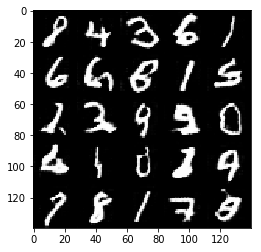

Epoch 2/2... Discriminator Loss: 0.6899... Generator Loss: 1.4978
Epoch 2/2... Discriminator Loss: 0.5516... Generator Loss: 2.1947
Epoch 2/2... Discriminator Loss: 0.5985... Generator Loss: 2.0306
Epoch 2/2... Discriminator Loss: 0.6131... Generator Loss: 2.1562
Epoch 2/2... Discriminator Loss: 0.7492... Generator Loss: 1.2207
Epoch 2/2... Discriminator Loss: 0.8532... Generator Loss: 1.1490
Epoch 2/2... Discriminator Loss: 1.1020... Generator Loss: 0.8403
Epoch 2/2... Discriminator Loss: 1.4278... Generator Loss: 0.5776
Epoch 2/2... Discriminator Loss: 0.5877... Generator Loss: 1.8344
Epoch 2/2... Discriminator Loss: 1.4592... Generator Loss: 2.7285


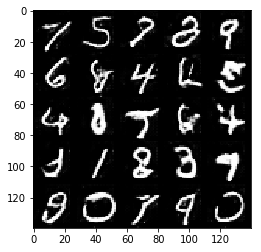

Epoch 2/2... Discriminator Loss: 1.1966... Generator Loss: 0.7509
Epoch 2/2... Discriminator Loss: 0.8688... Generator Loss: 1.7046
Epoch 2/2... Discriminator Loss: 0.6025... Generator Loss: 1.7521
Epoch 2/2... Discriminator Loss: 0.6888... Generator Loss: 1.4103
Epoch 2/2... Discriminator Loss: 0.5829... Generator Loss: 1.8511
Epoch 2/2... Discriminator Loss: 1.0813... Generator Loss: 0.8814
Epoch 2/2... Discriminator Loss: 1.5326... Generator Loss: 3.5974
Epoch 2/2... Discriminator Loss: 1.7238... Generator Loss: 0.5384
Epoch 2/2... Discriminator Loss: 0.6055... Generator Loss: 1.8383
Epoch 2/2... Discriminator Loss: 0.9671... Generator Loss: 1.0151


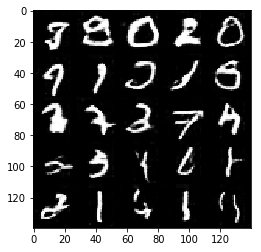

Epoch 2/2... Discriminator Loss: 0.6100... Generator Loss: 1.7959
Epoch 2/2... Discriminator Loss: 0.5880... Generator Loss: 1.8533
Epoch 2/2... Discriminator Loss: 0.9718... Generator Loss: 0.9408
Epoch 2/2... Discriminator Loss: 0.9961... Generator Loss: 1.0057
Epoch 2/2... Discriminator Loss: 1.3397... Generator Loss: 2.7581
Epoch 2/2... Discriminator Loss: 0.8450... Generator Loss: 1.3915
Epoch 2/2... Discriminator Loss: 0.7800... Generator Loss: 1.3026
Epoch 2/2... Discriminator Loss: 1.0827... Generator Loss: 0.7788
Epoch 2/2... Discriminator Loss: 0.7668... Generator Loss: 1.2612
Epoch 2/2... Discriminator Loss: 0.8483... Generator Loss: 1.1930


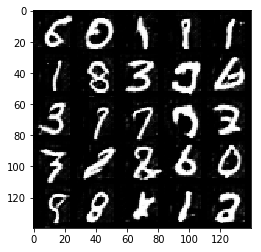

Epoch 2/2... Discriminator Loss: 0.6122... Generator Loss: 2.1939
Epoch 2/2... Discriminator Loss: 0.6296... Generator Loss: 1.5942
Epoch 2/2... Discriminator Loss: 1.8984... Generator Loss: 0.3355
Epoch 2/2... Discriminator Loss: 0.5036... Generator Loss: 2.4382
Epoch 2/2... Discriminator Loss: 1.7607... Generator Loss: 0.5040
Epoch 2/2... Discriminator Loss: 1.6082... Generator Loss: 0.4277
Epoch 2/2... Discriminator Loss: 0.5513... Generator Loss: 2.0852
Epoch 2/2... Discriminator Loss: 0.9475... Generator Loss: 0.9446
Epoch 2/2... Discriminator Loss: 0.5292... Generator Loss: 2.1105
Epoch 2/2... Discriminator Loss: 1.4698... Generator Loss: 0.5971


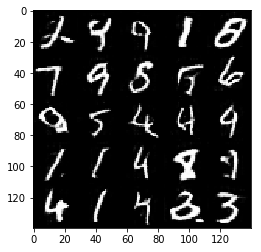

Epoch 2/2... Discriminator Loss: 1.0463... Generator Loss: 0.9417
Epoch 2/2... Discriminator Loss: 1.3161... Generator Loss: 0.6900
Epoch 2/2... Discriminator Loss: 0.8519... Generator Loss: 1.0828
Epoch 2/2... Discriminator Loss: 0.8456... Generator Loss: 1.1110
Epoch 2/2... Discriminator Loss: 1.0406... Generator Loss: 0.9338
Epoch 2/2... Discriminator Loss: 0.5786... Generator Loss: 1.7628
Epoch 2/2... Discriminator Loss: 0.6309... Generator Loss: 1.6266
Epoch 2/2... Discriminator Loss: 0.8145... Generator Loss: 1.1980
Epoch 2/2... Discriminator Loss: 0.6789... Generator Loss: 1.4321
Epoch 2/2... Discriminator Loss: 0.4499... Generator Loss: 2.8299


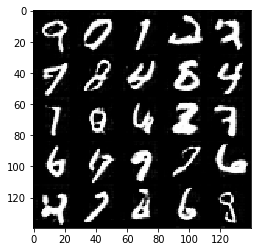

Epoch 2/2... Discriminator Loss: 0.8133... Generator Loss: 1.2968
Epoch 2/2... Discriminator Loss: 1.3442... Generator Loss: 0.6125
Epoch 2/2... Discriminator Loss: 0.8651... Generator Loss: 1.1251
Epoch 2/2... Discriminator Loss: 0.9862... Generator Loss: 0.9280
Epoch 2/2... Discriminator Loss: 0.8210... Generator Loss: 2.1430
Epoch 2/2... Discriminator Loss: 0.6590... Generator Loss: 1.9127
Epoch 2/2... Discriminator Loss: 0.7532... Generator Loss: 1.3669
Epoch 2/2... Discriminator Loss: 0.6526... Generator Loss: 1.7654
Epoch 2/2... Discriminator Loss: 0.8996... Generator Loss: 1.2214
Epoch 2/2... Discriminator Loss: 0.8068... Generator Loss: 1.1762


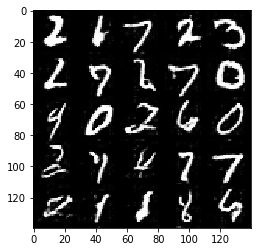

Epoch 2/2... Discriminator Loss: 0.6437... Generator Loss: 1.7455
Epoch 2/2... Discriminator Loss: 1.3819... Generator Loss: 0.5996
Epoch 2/2... Discriminator Loss: 0.5337... Generator Loss: 2.1273
Epoch 2/2... Discriminator Loss: 0.7890... Generator Loss: 1.6069
Epoch 2/2... Discriminator Loss: 0.5722... Generator Loss: 1.9148
Epoch 2/2... Discriminator Loss: 1.0142... Generator Loss: 0.8926
Epoch 2/2... Discriminator Loss: 0.6177... Generator Loss: 1.6535
Epoch 2/2... Discriminator Loss: 1.7034... Generator Loss: 0.4404
Epoch 2/2... Discriminator Loss: 1.5686... Generator Loss: 0.7820
Epoch 2/2... Discriminator Loss: 0.6479... Generator Loss: 1.5674


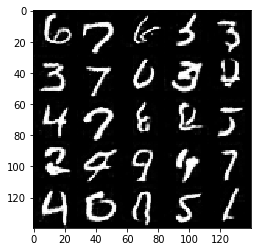

Epoch 2/2... Discriminator Loss: 0.7595... Generator Loss: 1.3926
Epoch 2/2... Discriminator Loss: 0.7980... Generator Loss: 1.2473
Epoch 2/2... Discriminator Loss: 0.9035... Generator Loss: 1.4196
Epoch 2/2... Discriminator Loss: 1.4047... Generator Loss: 0.6343
Epoch 2/2... Discriminator Loss: 0.7550... Generator Loss: 1.4847
Epoch 2/2... Discriminator Loss: 0.7615... Generator Loss: 1.2683
Epoch 2/2... Discriminator Loss: 0.9067... Generator Loss: 0.9730
Epoch 2/2... Discriminator Loss: 0.6508... Generator Loss: 1.9875
Epoch 2/2... Discriminator Loss: 0.5602... Generator Loss: 2.0575
Epoch 2/2... Discriminator Loss: 0.7177... Generator Loss: 1.3819


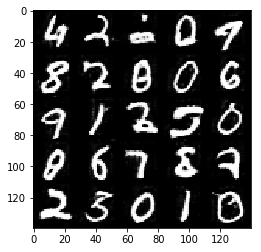

Epoch 2/2... Discriminator Loss: 0.5880... Generator Loss: 2.2319
Epoch 2/2... Discriminator Loss: 0.7822... Generator Loss: 1.3508
Epoch 2/2... Discriminator Loss: 0.8606... Generator Loss: 1.1863
Epoch 2/2... Discriminator Loss: 1.0004... Generator Loss: 0.9559
Epoch 2/2... Discriminator Loss: 1.7883... Generator Loss: 0.4516
Epoch 2/2... Discriminator Loss: 0.6239... Generator Loss: 1.8143
Epoch 2/2... Discriminator Loss: 1.2047... Generator Loss: 0.7046
Epoch 2/2... Discriminator Loss: 0.6610... Generator Loss: 2.1344
Epoch 2/2... Discriminator Loss: 1.4411... Generator Loss: 0.5982
Epoch 2/2... Discriminator Loss: 0.5495... Generator Loss: 1.8953


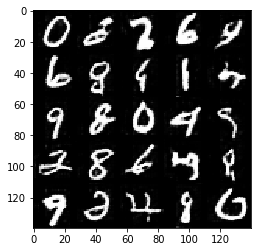

Epoch 2/2... Discriminator Loss: 0.6286... Generator Loss: 1.7594
Epoch 2/2... Discriminator Loss: 0.7034... Generator Loss: 1.3722
Epoch 2/2... Discriminator Loss: 0.9735... Generator Loss: 1.0637
Epoch 2/2... Discriminator Loss: 0.9909... Generator Loss: 0.8773
Epoch 2/2... Discriminator Loss: 0.5994... Generator Loss: 1.9760
Epoch 2/2... Discriminator Loss: 0.6413... Generator Loss: 1.6676


IndexError: list index out of range

In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
print (mnist_dataset.shape)
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)


### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.3385... Generator Loss: 0.6749
Epoch 1/1... Discriminator Loss: 0.4470... Generator Loss: 3.3087
Epoch 1/1... Discriminator Loss: 0.5388... Generator Loss: 2.3036
Epoch 1/1... Discriminator Loss: 0.4668... Generator Loss: 3.5259
Epoch 1/1... Discriminator Loss: 2.5769... Generator Loss: 13.6947
Epoch 1/1... Discriminator Loss: 0.5177... Generator Loss: 3.7103
Epoch 1/1... Discriminator Loss: 0.8434... Generator Loss: 1.4919
Epoch 1/1... Discriminator Loss: 1.2977... Generator Loss: 0.9534
Epoch 1/1... Discriminator Loss: 0.8253... Generator Loss: 1.5196


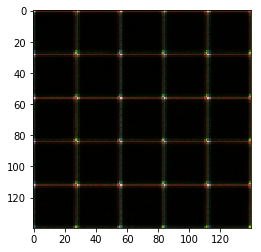

Epoch 1/1... Discriminator Loss: 1.0765... Generator Loss: 0.9588
Epoch 1/1... Discriminator Loss: 0.5359... Generator Loss: 2.1025
Epoch 1/1... Discriminator Loss: 0.6121... Generator Loss: 2.3509
Epoch 1/1... Discriminator Loss: 1.5707... Generator Loss: 0.5311
Epoch 1/1... Discriminator Loss: 0.8941... Generator Loss: 1.2606
Epoch 1/1... Discriminator Loss: 0.7963... Generator Loss: 1.7499
Epoch 1/1... Discriminator Loss: 2.1634... Generator Loss: 0.3497
Epoch 1/1... Discriminator Loss: 0.9740... Generator Loss: 1.3553
Epoch 1/1... Discriminator Loss: 0.8083... Generator Loss: 3.5374
Epoch 1/1... Discriminator Loss: 0.7495... Generator Loss: 1.6070


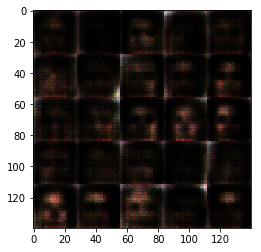

Epoch 1/1... Discriminator Loss: 0.5953... Generator Loss: 1.8752
Epoch 1/1... Discriminator Loss: 1.5777... Generator Loss: 0.4460
Epoch 1/1... Discriminator Loss: 0.4724... Generator Loss: 2.5809
Epoch 1/1... Discriminator Loss: 1.0012... Generator Loss: 1.5600
Epoch 1/1... Discriminator Loss: 0.7876... Generator Loss: 1.5894
Epoch 1/1... Discriminator Loss: 0.7062... Generator Loss: 1.7222
Epoch 1/1... Discriminator Loss: 0.6050... Generator Loss: 2.6077
Epoch 1/1... Discriminator Loss: 1.0079... Generator Loss: 0.8125
Epoch 1/1... Discriminator Loss: 1.1270... Generator Loss: 1.0239
Epoch 1/1... Discriminator Loss: 0.8893... Generator Loss: 1.3903


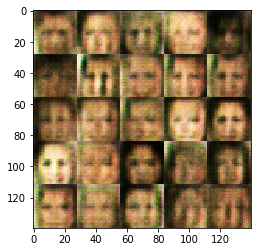

Epoch 1/1... Discriminator Loss: 0.6275... Generator Loss: 1.9751
Epoch 1/1... Discriminator Loss: 0.6719... Generator Loss: 3.2284
Epoch 1/1... Discriminator Loss: 1.0641... Generator Loss: 1.2934
Epoch 1/1... Discriminator Loss: 0.8401... Generator Loss: 1.5359
Epoch 1/1... Discriminator Loss: 0.8062... Generator Loss: 1.2999
Epoch 1/1... Discriminator Loss: 1.0209... Generator Loss: 4.0131
Epoch 1/1... Discriminator Loss: 0.5617... Generator Loss: 2.4067
Epoch 1/1... Discriminator Loss: 0.9079... Generator Loss: 1.1508
Epoch 1/1... Discriminator Loss: 0.6527... Generator Loss: 2.0691
Epoch 1/1... Discriminator Loss: 0.6845... Generator Loss: 2.1301


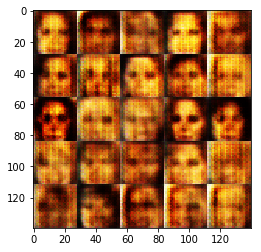

Epoch 1/1... Discriminator Loss: 0.8580... Generator Loss: 1.1365
Epoch 1/1... Discriminator Loss: 1.7209... Generator Loss: 0.4091
Epoch 1/1... Discriminator Loss: 1.1805... Generator Loss: 0.8399
Epoch 1/1... Discriminator Loss: 0.6801... Generator Loss: 1.6412
Epoch 1/1... Discriminator Loss: 1.7176... Generator Loss: 0.5233
Epoch 1/1... Discriminator Loss: 0.9617... Generator Loss: 1.0254
Epoch 1/1... Discriminator Loss: 0.7600... Generator Loss: 2.6279
Epoch 1/1... Discriminator Loss: 0.6012... Generator Loss: 2.5024
Epoch 1/1... Discriminator Loss: 0.7388... Generator Loss: 2.3460
Epoch 1/1... Discriminator Loss: 0.9064... Generator Loss: 1.3049


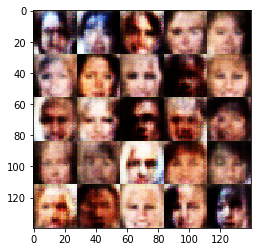

Epoch 1/1... Discriminator Loss: 1.1270... Generator Loss: 0.8663
Epoch 1/1... Discriminator Loss: 0.7185... Generator Loss: 1.9115
Epoch 1/1... Discriminator Loss: 0.6923... Generator Loss: 1.5699
Epoch 1/1... Discriminator Loss: 0.6558... Generator Loss: 1.7774
Epoch 1/1... Discriminator Loss: 0.7697... Generator Loss: 2.8380
Epoch 1/1... Discriminator Loss: 1.3829... Generator Loss: 0.6415
Epoch 1/1... Discriminator Loss: 0.5989... Generator Loss: 2.0135
Epoch 1/1... Discriminator Loss: 0.5826... Generator Loss: 2.1071
Epoch 1/1... Discriminator Loss: 0.8324... Generator Loss: 1.7616
Epoch 1/1... Discriminator Loss: 1.2088... Generator Loss: 0.7132


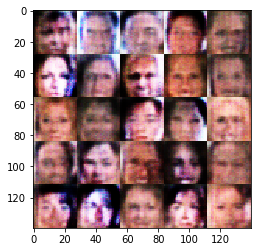

Epoch 1/1... Discriminator Loss: 0.6280... Generator Loss: 1.7296
Epoch 1/1... Discriminator Loss: 0.7585... Generator Loss: 1.3612
Epoch 1/1... Discriminator Loss: 0.7584... Generator Loss: 1.6666
Epoch 1/1... Discriminator Loss: 0.7156... Generator Loss: 1.4466
Epoch 1/1... Discriminator Loss: 1.4148... Generator Loss: 0.5815
Epoch 1/1... Discriminator Loss: 0.5268... Generator Loss: 2.1534
Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 3.5526
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.5154
Epoch 1/1... Discriminator Loss: 0.8342... Generator Loss: 1.2631
Epoch 1/1... Discriminator Loss: 1.3726... Generator Loss: 0.5460


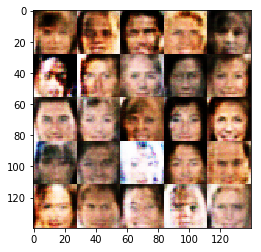

Epoch 1/1... Discriminator Loss: 0.5805... Generator Loss: 1.7724
Epoch 1/1... Discriminator Loss: 0.6362... Generator Loss: 1.7804
Epoch 1/1... Discriminator Loss: 0.6633... Generator Loss: 1.6245
Epoch 1/1... Discriminator Loss: 0.8010... Generator Loss: 3.9686
Epoch 1/1... Discriminator Loss: 0.8588... Generator Loss: 1.2046
Epoch 1/1... Discriminator Loss: 0.7748... Generator Loss: 1.2298
Epoch 1/1... Discriminator Loss: 0.6628... Generator Loss: 2.3760
Epoch 1/1... Discriminator Loss: 0.7149... Generator Loss: 1.6184
Epoch 1/1... Discriminator Loss: 0.8917... Generator Loss: 2.2214
Epoch 1/1... Discriminator Loss: 0.6615... Generator Loss: 1.8963


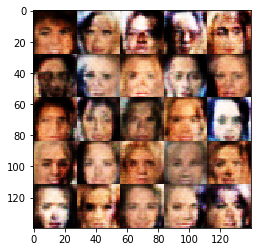

Epoch 1/1... Discriminator Loss: 0.6002... Generator Loss: 1.9370
Epoch 1/1... Discriminator Loss: 0.9205... Generator Loss: 4.3646
Epoch 1/1... Discriminator Loss: 0.6556... Generator Loss: 3.2456
Epoch 1/1... Discriminator Loss: 0.6887... Generator Loss: 1.5405
Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 3.8424
Epoch 1/1... Discriminator Loss: 0.5696... Generator Loss: 2.7476
Epoch 1/1... Discriminator Loss: 0.9328... Generator Loss: 2.7347
Epoch 1/1... Discriminator Loss: 0.7656... Generator Loss: 1.2770
Epoch 1/1... Discriminator Loss: 0.4851... Generator Loss: 2.5545
Epoch 1/1... Discriminator Loss: 0.5084... Generator Loss: 2.2688


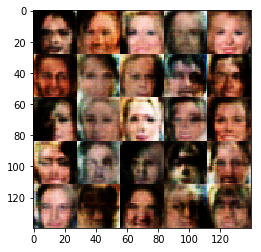

Epoch 1/1... Discriminator Loss: 0.4577... Generator Loss: 2.7077
Epoch 1/1... Discriminator Loss: 1.8724... Generator Loss: 0.3313
Epoch 1/1... Discriminator Loss: 0.3530... Generator Loss: 4.8284
Epoch 1/1... Discriminator Loss: 0.3722... Generator Loss: 4.2848
Epoch 1/1... Discriminator Loss: 0.6855... Generator Loss: 1.5030
Epoch 1/1... Discriminator Loss: 0.7452... Generator Loss: 6.5251
Epoch 1/1... Discriminator Loss: 0.4040... Generator Loss: 3.6582
Epoch 1/1... Discriminator Loss: 0.8302... Generator Loss: 1.2093
Epoch 1/1... Discriminator Loss: 0.6434... Generator Loss: 4.7696
Epoch 1/1... Discriminator Loss: 0.6357... Generator Loss: 1.6942


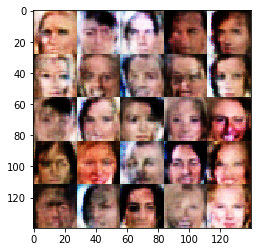

Epoch 1/1... Discriminator Loss: 0.4165... Generator Loss: 3.0893
Epoch 1/1... Discriminator Loss: 0.4148... Generator Loss: 3.7076
Epoch 1/1... Discriminator Loss: 0.4033... Generator Loss: 3.2628
Epoch 1/1... Discriminator Loss: 0.7313... Generator Loss: 8.0434
Epoch 1/1... Discriminator Loss: 1.2732... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 0.4684... Generator Loss: 2.6898
Epoch 1/1... Discriminator Loss: 0.3525... Generator Loss: 5.9596
Epoch 1/1... Discriminator Loss: 0.3511... Generator Loss: 4.8802
Epoch 1/1... Discriminator Loss: 0.4481... Generator Loss: 2.4429
Epoch 1/1... Discriminator Loss: 0.3626... Generator Loss: 4.8595


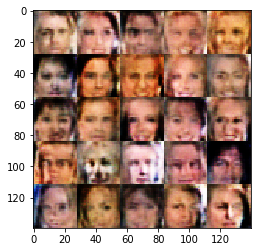

Epoch 1/1... Discriminator Loss: 0.5357... Generator Loss: 7.9748
Epoch 1/1... Discriminator Loss: 0.7309... Generator Loss: 1.3860
Epoch 1/1... Discriminator Loss: 0.6463... Generator Loss: 1.5065
Epoch 1/1... Discriminator Loss: 1.2768... Generator Loss: 3.8082
Epoch 1/1... Discriminator Loss: 0.4244... Generator Loss: 3.2655
Epoch 1/1... Discriminator Loss: 0.6120... Generator Loss: 1.6165
Epoch 1/1... Discriminator Loss: 0.3724... Generator Loss: 3.8862
Epoch 1/1... Discriminator Loss: 0.5144... Generator Loss: 2.3224
Epoch 1/1... Discriminator Loss: 0.4884... Generator Loss: 4.1652
Epoch 1/1... Discriminator Loss: 0.3625... Generator Loss: 5.0307


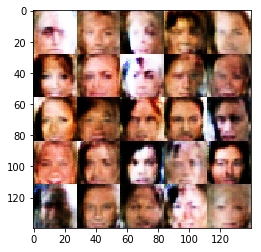

Epoch 1/1... Discriminator Loss: 0.4419... Generator Loss: 6.3174
Epoch 1/1... Discriminator Loss: 0.3649... Generator Loss: 5.0630
Epoch 1/1... Discriminator Loss: 0.4170... Generator Loss: 3.1790
Epoch 1/1... Discriminator Loss: 0.3571... Generator Loss: 5.0807
Epoch 1/1... Discriminator Loss: 0.7948... Generator Loss: 1.2796
Epoch 1/1... Discriminator Loss: 0.3517... Generator Loss: 6.2912
Epoch 1/1... Discriminator Loss: 0.3473... Generator Loss: 5.4196
Epoch 1/1... Discriminator Loss: 0.8682... Generator Loss: 1.1003
Epoch 1/1... Discriminator Loss: 0.3846... Generator Loss: 3.5227
Epoch 1/1... Discriminator Loss: 0.3455... Generator Loss: 5.2164


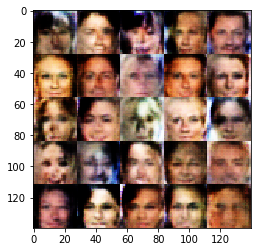

Epoch 1/1... Discriminator Loss: 0.4164... Generator Loss: 6.0679
Epoch 1/1... Discriminator Loss: 0.9055... Generator Loss: 2.8064
Epoch 1/1... Discriminator Loss: 1.0745... Generator Loss: 0.9634
Epoch 1/1... Discriminator Loss: 0.6080... Generator Loss: 6.8001
Epoch 1/1... Discriminator Loss: 0.5985... Generator Loss: 2.0342
Epoch 1/1... Discriminator Loss: 1.0437... Generator Loss: 3.3047
Epoch 1/1... Discriminator Loss: 0.7406... Generator Loss: 1.2763
Epoch 1/1... Discriminator Loss: 0.3701... Generator Loss: 6.5126
Epoch 1/1... Discriminator Loss: 0.6491... Generator Loss: 1.5080
Epoch 1/1... Discriminator Loss: 0.3921... Generator Loss: 3.3125


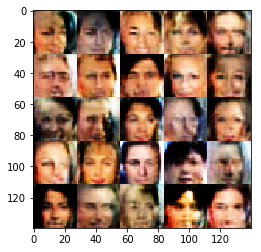

Epoch 1/1... Discriminator Loss: 0.4039... Generator Loss: 3.2590
Epoch 1/1... Discriminator Loss: 0.3922... Generator Loss: 6.7172
Epoch 1/1... Discriminator Loss: 0.4351... Generator Loss: 7.1069
Epoch 1/1... Discriminator Loss: 0.3872... Generator Loss: 3.5149
Epoch 1/1... Discriminator Loss: 0.3446... Generator Loss: 5.6641
Epoch 1/1... Discriminator Loss: 0.3560... Generator Loss: 7.3421
Epoch 1/1... Discriminator Loss: 0.3815... Generator Loss: 3.5499
Epoch 1/1... Discriminator Loss: 0.6218... Generator Loss: 1.6830
Epoch 1/1... Discriminator Loss: 0.3539... Generator Loss: 4.6878
Epoch 1/1... Discriminator Loss: 0.3707... Generator Loss: 3.9378


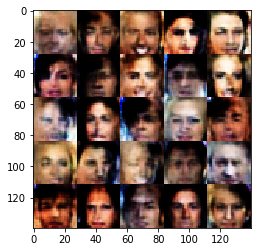

Epoch 1/1... Discriminator Loss: 0.3592... Generator Loss: 5.6826
Epoch 1/1... Discriminator Loss: 0.3599... Generator Loss: 5.0884
Epoch 1/1... Discriminator Loss: 0.3395... Generator Loss: 5.7271
Epoch 1/1... Discriminator Loss: 0.3868... Generator Loss: 3.4202
Epoch 1/1... Discriminator Loss: 0.6924... Generator Loss: 2.3282
Epoch 1/1... Discriminator Loss: 0.3483... Generator Loss: 7.9174
Epoch 1/1... Discriminator Loss: 0.4960... Generator Loss: 2.3805
Epoch 1/1... Discriminator Loss: 0.3432... Generator Loss: 7.3690
Epoch 1/1... Discriminator Loss: 0.3568... Generator Loss: 4.3454
Epoch 1/1... Discriminator Loss: 0.3545... Generator Loss: 4.4241


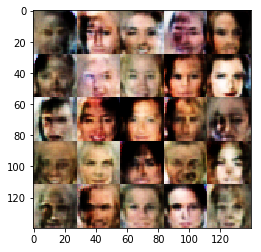

Epoch 1/1... Discriminator Loss: 0.4323... Generator Loss: 6.6002
Epoch 1/1... Discriminator Loss: 1.6034... Generator Loss: 0.4747
Epoch 1/1... Discriminator Loss: 0.7387... Generator Loss: 2.4958
Epoch 1/1... Discriminator Loss: 0.3887... Generator Loss: 4.0381
Epoch 1/1... Discriminator Loss: 0.4101... Generator Loss: 3.1477
Epoch 1/1... Discriminator Loss: 0.3555... Generator Loss: 7.8238
Epoch 1/1... Discriminator Loss: 0.3576... Generator Loss: 4.3338
Epoch 1/1... Discriminator Loss: 0.3526... Generator Loss: 4.1497
Epoch 1/1... Discriminator Loss: 1.0085... Generator Loss: 3.0640
Epoch 1/1... Discriminator Loss: 0.6407... Generator Loss: 2.2681


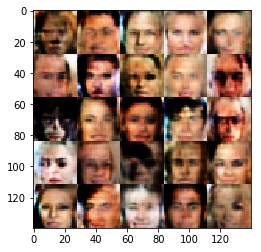

Epoch 1/1... Discriminator Loss: 0.4688... Generator Loss: 3.0337
Epoch 1/1... Discriminator Loss: 0.3436... Generator Loss: 6.0688
Epoch 1/1... Discriminator Loss: 0.3989... Generator Loss: 3.4682
Epoch 1/1... Discriminator Loss: 0.3553... Generator Loss: 4.6219
Epoch 1/1... Discriminator Loss: 0.3536... Generator Loss: 5.8607
Epoch 1/1... Discriminator Loss: 0.3432... Generator Loss: 5.1422
Epoch 1/1... Discriminator Loss: 0.3385... Generator Loss: 6.9997
Epoch 1/1... Discriminator Loss: 0.3506... Generator Loss: 5.3451
Epoch 1/1... Discriminator Loss: 0.3905... Generator Loss: 3.2921
Epoch 1/1... Discriminator Loss: 0.3785... Generator Loss: 3.4665


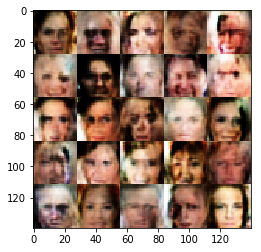

Epoch 1/1... Discriminator Loss: 0.3771... Generator Loss: 6.2005
Epoch 1/1... Discriminator Loss: 0.3428... Generator Loss: 7.2695
Epoch 1/1... Discriminator Loss: 0.5526... Generator Loss: 1.9038
Epoch 1/1... Discriminator Loss: 0.3415... Generator Loss: 6.9199
Epoch 1/1... Discriminator Loss: 0.3810... Generator Loss: 6.5686
Epoch 1/1... Discriminator Loss: 0.3600... Generator Loss: 4.2056
Epoch 1/1... Discriminator Loss: 0.3980... Generator Loss: 3.3966
Epoch 1/1... Discriminator Loss: 0.3414... Generator Loss: 5.5044
Epoch 1/1... Discriminator Loss: 0.3873... Generator Loss: 4.6258
Epoch 1/1... Discriminator Loss: 0.3873... Generator Loss: 4.9779


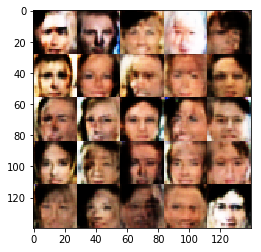

Epoch 1/1... Discriminator Loss: 2.3007... Generator Loss: 0.3715
Epoch 1/1... Discriminator Loss: 0.3908... Generator Loss: 4.0317
Epoch 1/1... Discriminator Loss: 0.3852... Generator Loss: 5.0541
Epoch 1/1... Discriminator Loss: 0.3789... Generator Loss: 4.7436
Epoch 1/1... Discriminator Loss: 0.3599... Generator Loss: 4.6378
Epoch 1/1... Discriminator Loss: 0.3515... Generator Loss: 6.2093
Epoch 1/1... Discriminator Loss: 0.4817... Generator Loss: 3.4202
Epoch 1/1... Discriminator Loss: 0.7089... Generator Loss: 1.4889
Epoch 1/1... Discriminator Loss: 0.3742... Generator Loss: 4.2911
Epoch 1/1... Discriminator Loss: 2.1586... Generator Loss: 4.1891


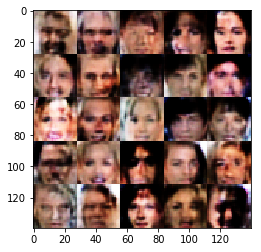

Epoch 1/1... Discriminator Loss: 0.3919... Generator Loss: 3.6212
Epoch 1/1... Discriminator Loss: 0.4534... Generator Loss: 2.6753
Epoch 1/1... Discriminator Loss: 0.3697... Generator Loss: 4.7923
Epoch 1/1... Discriminator Loss: 0.5116... Generator Loss: 1.9978
Epoch 1/1... Discriminator Loss: 0.3531... Generator Loss: 4.6244
Epoch 1/1... Discriminator Loss: 0.3549... Generator Loss: 8.1285
Epoch 1/1... Discriminator Loss: 0.3814... Generator Loss: 3.6682
Epoch 1/1... Discriminator Loss: 0.7604... Generator Loss: 2.2299
Epoch 1/1... Discriminator Loss: 0.3522... Generator Loss: 5.4432
Epoch 1/1... Discriminator Loss: 0.3439... Generator Loss: 5.5281


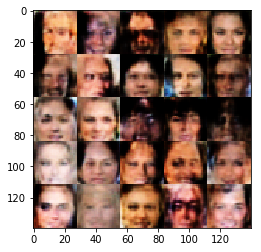

Epoch 1/1... Discriminator Loss: 0.3592... Generator Loss: 4.7564
Epoch 1/1... Discriminator Loss: 0.3392... Generator Loss: 7.4305
Epoch 1/1... Discriminator Loss: 0.5356... Generator Loss: 2.2623
Epoch 1/1... Discriminator Loss: 0.3554... Generator Loss: 4.9424
Epoch 1/1... Discriminator Loss: 0.4015... Generator Loss: 3.3256
Epoch 1/1... Discriminator Loss: 0.3534... Generator Loss: 5.4984
Epoch 1/1... Discriminator Loss: 0.3441... Generator Loss: 4.8834
Epoch 1/1... Discriminator Loss: 0.3424... Generator Loss: 6.4243
Epoch 1/1... Discriminator Loss: 1.7677... Generator Loss: 0.4297
Epoch 1/1... Discriminator Loss: 0.5961... Generator Loss: 2.1491


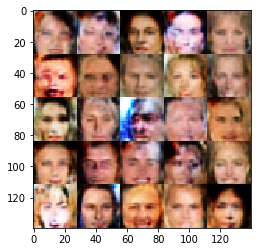

Epoch 1/1... Discriminator Loss: 0.7166... Generator Loss: 3.1501
Epoch 1/1... Discriminator Loss: 0.3993... Generator Loss: 3.0426
Epoch 1/1... Discriminator Loss: 0.3927... Generator Loss: 3.3253
Epoch 1/1... Discriminator Loss: 0.3574... Generator Loss: 4.8826
Epoch 1/1... Discriminator Loss: 0.3918... Generator Loss: 5.1854
Epoch 1/1... Discriminator Loss: 0.3444... Generator Loss: 6.4204
Epoch 1/1... Discriminator Loss: 0.3491... Generator Loss: 5.9274
Epoch 1/1... Discriminator Loss: 0.4299... Generator Loss: 4.1093
Epoch 1/1... Discriminator Loss: 0.4114... Generator Loss: 3.0112
Epoch 1/1... Discriminator Loss: 0.3628... Generator Loss: 5.9641


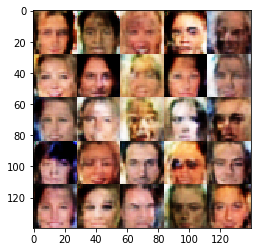

Epoch 1/1... Discriminator Loss: 0.3497... Generator Loss: 5.5373
Epoch 1/1... Discriminator Loss: 0.4855... Generator Loss: 2.3044
Epoch 1/1... Discriminator Loss: 0.3651... Generator Loss: 4.2638
Epoch 1/1... Discriminator Loss: 0.4107... Generator Loss: 3.1309
Epoch 1/1... Discriminator Loss: 0.3532... Generator Loss: 6.1951
Epoch 1/1... Discriminator Loss: 0.3447... Generator Loss: 6.1037
Epoch 1/1... Discriminator Loss: 0.3560... Generator Loss: 4.7764
Epoch 1/1... Discriminator Loss: 0.3751... Generator Loss: 3.6181
Epoch 1/1... Discriminator Loss: 0.3672... Generator Loss: 7.3813
Epoch 1/1... Discriminator Loss: 0.3460... Generator Loss: 6.5235


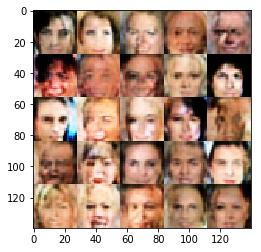

Epoch 1/1... Discriminator Loss: 1.4231... Generator Loss: 3.8196
Epoch 1/1... Discriminator Loss: 1.1479... Generator Loss: 0.9364
Epoch 1/1... Discriminator Loss: 0.4068... Generator Loss: 3.2479
Epoch 1/1... Discriminator Loss: 0.3697... Generator Loss: 5.3452
Epoch 1/1... Discriminator Loss: 0.3860... Generator Loss: 3.4542
Epoch 1/1... Discriminator Loss: 0.3551... Generator Loss: 6.3580
Epoch 1/1... Discriminator Loss: 0.3787... Generator Loss: 3.9812
Epoch 1/1... Discriminator Loss: 0.3755... Generator Loss: 3.7692
Epoch 1/1... Discriminator Loss: 0.3638... Generator Loss: 6.4675
Epoch 1/1... Discriminator Loss: 0.3695... Generator Loss: 4.1359


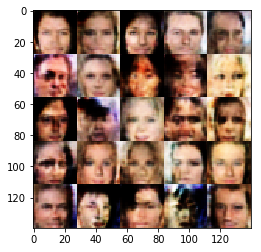

Epoch 1/1... Discriminator Loss: 0.3602... Generator Loss: 5.5667
Epoch 1/1... Discriminator Loss: 0.3733... Generator Loss: 5.7602
Epoch 1/1... Discriminator Loss: 0.3631... Generator Loss: 4.4134
Epoch 1/1... Discriminator Loss: 0.4081... Generator Loss: 3.2175
Epoch 1/1... Discriminator Loss: 0.3938... Generator Loss: 3.3340
Epoch 1/1... Discriminator Loss: 0.3461... Generator Loss: 4.8672
Epoch 1/1... Discriminator Loss: 0.3568... Generator Loss: 4.6080
Epoch 1/1... Discriminator Loss: 0.3488... Generator Loss: 5.6826
Epoch 1/1... Discriminator Loss: 0.3401... Generator Loss: 6.4950
Epoch 1/1... Discriminator Loss: 0.4963... Generator Loss: 2.3512


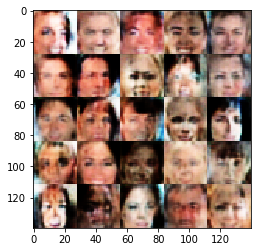

Epoch 1/1... Discriminator Loss: 1.2966... Generator Loss: 0.6755
Epoch 1/1... Discriminator Loss: 0.4432... Generator Loss: 3.3153
Epoch 1/1... Discriminator Loss: 0.3557... Generator Loss: 6.4051
Epoch 1/1... Discriminator Loss: 0.3408... Generator Loss: 7.0691
Epoch 1/1... Discriminator Loss: 0.4172... Generator Loss: 3.1559
Epoch 1/1... Discriminator Loss: 0.4140... Generator Loss: 4.9470
Epoch 1/1... Discriminator Loss: 1.2576... Generator Loss: 0.7017
Epoch 1/1... Discriminator Loss: 0.4974... Generator Loss: 2.1389
Epoch 1/1... Discriminator Loss: 0.3772... Generator Loss: 6.7388
Epoch 1/1... Discriminator Loss: 0.3695... Generator Loss: 4.4533


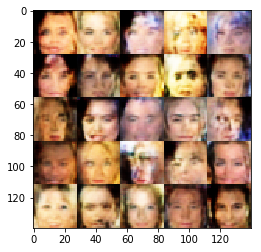

Epoch 1/1... Discriminator Loss: 0.3783... Generator Loss: 3.6122
Epoch 1/1... Discriminator Loss: 0.3703... Generator Loss: 4.0522
Epoch 1/1... Discriminator Loss: 0.6879... Generator Loss: 1.7290
Epoch 1/1... Discriminator Loss: 0.4463... Generator Loss: 3.0432
Epoch 1/1... Discriminator Loss: 1.9570... Generator Loss: 0.3224
Epoch 1/1... Discriminator Loss: 0.4303... Generator Loss: 3.1634
Epoch 1/1... Discriminator Loss: 0.4429... Generator Loss: 3.4116
Epoch 1/1... Discriminator Loss: 0.5315... Generator Loss: 2.1159
Epoch 1/1... Discriminator Loss: 0.3927... Generator Loss: 4.9305
Epoch 1/1... Discriminator Loss: 0.4653... Generator Loss: 2.3892


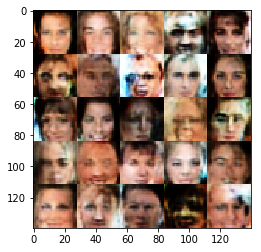

Epoch 1/1... Discriminator Loss: 0.4545... Generator Loss: 2.6954
Epoch 1/1... Discriminator Loss: 0.3712... Generator Loss: 4.8424
Epoch 1/1... Discriminator Loss: 0.5110... Generator Loss: 2.0103
Epoch 1/1... Discriminator Loss: 0.5582... Generator Loss: 2.3079
Epoch 1/1... Discriminator Loss: 0.4999... Generator Loss: 2.3383
Epoch 1/1... Discriminator Loss: 0.4393... Generator Loss: 5.8068
Epoch 1/1... Discriminator Loss: 0.3743... Generator Loss: 3.8932
Epoch 1/1... Discriminator Loss: 0.4364... Generator Loss: 4.2494
Epoch 1/1... Discriminator Loss: 0.3622... Generator Loss: 4.4665
Epoch 1/1... Discriminator Loss: 0.4226... Generator Loss: 4.5145


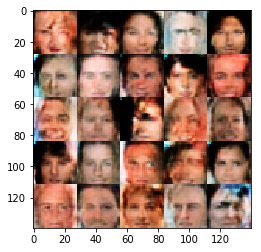

Epoch 1/1... Discriminator Loss: 0.4215... Generator Loss: 2.7837
Epoch 1/1... Discriminator Loss: 0.3792... Generator Loss: 5.6302
Epoch 1/1... Discriminator Loss: 0.6740... Generator Loss: 6.2360
Epoch 1/1... Discriminator Loss: 0.4887... Generator Loss: 2.4583
Epoch 1/1... Discriminator Loss: 0.4480... Generator Loss: 3.0540
Epoch 1/1... Discriminator Loss: 0.3856... Generator Loss: 3.3576
Epoch 1/1... Discriminator Loss: 0.3724... Generator Loss: 5.5355
Epoch 1/1... Discriminator Loss: 1.0375... Generator Loss: 0.9022
Epoch 1/1... Discriminator Loss: 0.3988... Generator Loss: 4.2975
Epoch 1/1... Discriminator Loss: 0.3930... Generator Loss: 3.4636


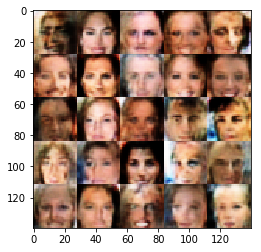

Epoch 1/1... Discriminator Loss: 0.4921... Generator Loss: 2.3805
Epoch 1/1... Discriminator Loss: 0.8602... Generator Loss: 1.5645
Epoch 1/1... Discriminator Loss: 0.3681... Generator Loss: 4.4695
Epoch 1/1... Discriminator Loss: 0.3677... Generator Loss: 3.9075
Epoch 1/1... Discriminator Loss: 0.3531... Generator Loss: 5.1281
Epoch 1/1... Discriminator Loss: 0.3597... Generator Loss: 7.2005
Epoch 1/1... Discriminator Loss: 0.9513... Generator Loss: 3.6798
Epoch 1/1... Discriminator Loss: 0.6417... Generator Loss: 2.0763
Epoch 1/1... Discriminator Loss: 0.4028... Generator Loss: 4.1423
Epoch 1/1... Discriminator Loss: 0.4123... Generator Loss: 3.0956


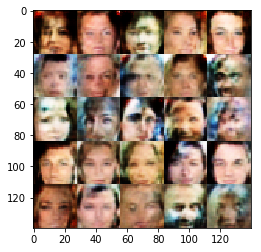

Epoch 1/1... Discriminator Loss: 0.3412... Generator Loss: 7.3937
Epoch 1/1... Discriminator Loss: 0.3803... Generator Loss: 3.5409
Epoch 1/1... Discriminator Loss: 0.3760... Generator Loss: 3.5952
Epoch 1/1... Discriminator Loss: 0.3953... Generator Loss: 5.4242
Epoch 1/1... Discriminator Loss: 0.3491... Generator Loss: 6.0521
Epoch 1/1... Discriminator Loss: 0.4663... Generator Loss: 2.3745
Epoch 1/1... Discriminator Loss: 0.3818... Generator Loss: 3.6783
Epoch 1/1... Discriminator Loss: 0.5739... Generator Loss: 1.6926
Epoch 1/1... Discriminator Loss: 0.4192... Generator Loss: 2.8787
Epoch 1/1... Discriminator Loss: 3.0476... Generator Loss: 0.1840


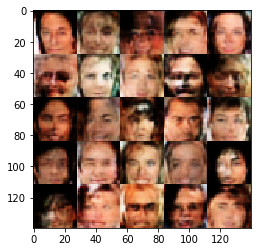

Epoch 1/1... Discriminator Loss: 0.3969... Generator Loss: 3.4517
Epoch 1/1... Discriminator Loss: 0.3692... Generator Loss: 4.0876
Epoch 1/1... Discriminator Loss: 0.3521... Generator Loss: 6.5786
Epoch 1/1... Discriminator Loss: 0.3444... Generator Loss: 5.9109
Epoch 1/1... Discriminator Loss: 0.3618... Generator Loss: 4.3639
Epoch 1/1... Discriminator Loss: 0.4656... Generator Loss: 2.4391
Epoch 1/1... Discriminator Loss: 0.3738... Generator Loss: 3.7981
Epoch 1/1... Discriminator Loss: 0.4243... Generator Loss: 3.8645
Epoch 1/1... Discriminator Loss: 0.4119... Generator Loss: 3.1050
Epoch 1/1... Discriminator Loss: 0.4930... Generator Loss: 5.7595
Epoch 1/1... Discriminator Loss: 0.5014... Generator Loss: 4.6520


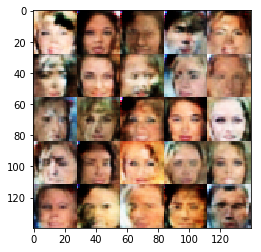

Epoch 1/1... Discriminator Loss: 0.3532... Generator Loss: 6.8477
Epoch 1/1... Discriminator Loss: 0.3711... Generator Loss: 4.0326
Epoch 1/1... Discriminator Loss: 0.7665... Generator Loss: 1.2296
Epoch 1/1... Discriminator Loss: 0.5192... Generator Loss: 2.3994
Epoch 1/1... Discriminator Loss: 0.4573... Generator Loss: 2.6903
Epoch 1/1... Discriminator Loss: 0.3457... Generator Loss: 8.0539
Epoch 1/1... Discriminator Loss: 0.3532... Generator Loss: 4.4945
Epoch 1/1... Discriminator Loss: 0.3654... Generator Loss: 4.0148
Epoch 1/1... Discriminator Loss: 0.3454... Generator Loss: 5.5635
Epoch 1/1... Discriminator Loss: 0.9425... Generator Loss: 1.0623


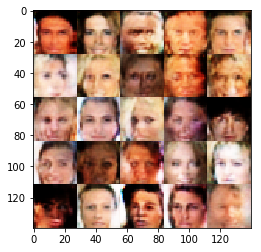

Epoch 1/1... Discriminator Loss: 0.4860... Generator Loss: 2.5414
Epoch 1/1... Discriminator Loss: 0.3506... Generator Loss: 5.9554
Epoch 1/1... Discriminator Loss: 0.5377... Generator Loss: 2.0987
Epoch 1/1... Discriminator Loss: 0.5498... Generator Loss: 2.0340
Epoch 1/1... Discriminator Loss: 0.8275... Generator Loss: 1.3677
Epoch 1/1... Discriminator Loss: 0.5023... Generator Loss: 2.3396
Epoch 1/1... Discriminator Loss: 0.4711... Generator Loss: 2.7414
Epoch 1/1... Discriminator Loss: 0.4503... Generator Loss: 3.1579
Epoch 1/1... Discriminator Loss: 0.3983... Generator Loss: 3.2503
Epoch 1/1... Discriminator Loss: 0.3845... Generator Loss: 3.5223


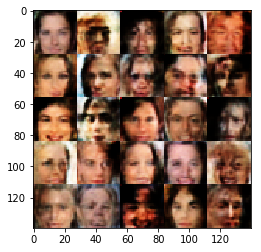

Epoch 1/1... Discriminator Loss: 0.5883... Generator Loss: 1.7972
Epoch 1/1... Discriminator Loss: 0.3650... Generator Loss: 4.5111
Epoch 1/1... Discriminator Loss: 0.4337... Generator Loss: 3.1059
Epoch 1/1... Discriminator Loss: 0.4277... Generator Loss: 2.8542
Epoch 1/1... Discriminator Loss: 0.5101... Generator Loss: 4.0379
Epoch 1/1... Discriminator Loss: 0.4737... Generator Loss: 2.2733
Epoch 1/1... Discriminator Loss: 0.6840... Generator Loss: 1.3537
Epoch 1/1... Discriminator Loss: 0.3454... Generator Loss: 7.0091
Epoch 1/1... Discriminator Loss: 0.4992... Generator Loss: 2.1262
Epoch 1/1... Discriminator Loss: 0.3705... Generator Loss: 4.1931


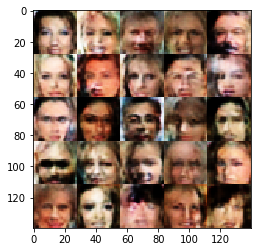

Epoch 1/1... Discriminator Loss: 0.3951... Generator Loss: 3.3100
Epoch 1/1... Discriminator Loss: 0.3512... Generator Loss: 4.7720
Epoch 1/1... Discriminator Loss: 0.3814... Generator Loss: 3.5798
Epoch 1/1... Discriminator Loss: 0.4689... Generator Loss: 2.3032
Epoch 1/1... Discriminator Loss: 0.3986... Generator Loss: 3.3749
Epoch 1/1... Discriminator Loss: 0.5476... Generator Loss: 2.0565
Epoch 1/1... Discriminator Loss: 0.3821... Generator Loss: 3.6544
Epoch 1/1... Discriminator Loss: 0.7759... Generator Loss: 1.4809
Epoch 1/1... Discriminator Loss: 0.3560... Generator Loss: 4.2272
Epoch 1/1... Discriminator Loss: 0.3496... Generator Loss: 6.5550


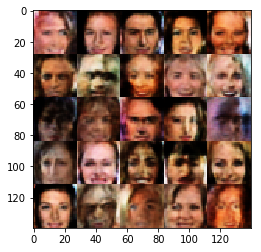

Epoch 1/1... Discriminator Loss: 0.4107... Generator Loss: 3.5258
Epoch 1/1... Discriminator Loss: 0.6849... Generator Loss: 3.2242
Epoch 1/1... Discriminator Loss: 1.2763... Generator Loss: 0.7820
Epoch 1/1... Discriminator Loss: 0.6051... Generator Loss: 3.4169
Epoch 1/1... Discriminator Loss: 0.3676... Generator Loss: 5.0918
Epoch 1/1... Discriminator Loss: 0.4039... Generator Loss: 3.1979
Epoch 1/1... Discriminator Loss: 0.7911... Generator Loss: 1.3287
Epoch 1/1... Discriminator Loss: 0.3853... Generator Loss: 3.9152
Epoch 1/1... Discriminator Loss: 0.4618... Generator Loss: 2.7071
Epoch 1/1... Discriminator Loss: 0.3570... Generator Loss: 6.9214


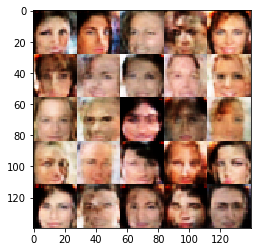

Epoch 1/1... Discriminator Loss: 0.3651... Generator Loss: 4.0958


IndexError: list index out of range

In [ ]:
batch_size = 32
z_dim = 120
learning_rate = .0001
beta1 = .5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.